In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# simplify from 0-9 to 0-3 (inclusive)

'''
Overstride:         0-1, 2, 3-4, 5-9
Forward Lean:       0, 1-2, 3-4, 5-9
Backward Lean:      0, 1-3, 4-5, 6-9
Sweeping:           0-2, 3-4, 5-6, 7-9
Low Arms:           0, 1-2, 3-5, 6-9

'''

In [7]:
def new_filename(strfilename):
    filename = [char for char in strfilename]
    o = int(filename[4])
    f = int(filename[7])
    b = int(filename[10])
    s = int(filename[13])
    l = int(filename[16])
    if (o >= 0 and o <= 1):
        filename[4] = '0'
    elif(o == 2):
        filename[4] = '1'
    elif(o >= 3 and o <= 4):
        filename[4] = '2'
    elif(o >= 5 and o <= 9):
        filename[4] = '3'
    
    if (f == 0):
        filename[7] = '0'
    elif(f >= 1 and f <= 2):
        filename[7] = '1'
    elif(f >= 3 and f <= 4):
        filename[7] = '2'
    elif(f >= 5 and f <= 9):
        filename[7] = '3'

    if (b == 0):
        filename[10] = '0'
    elif(b >= 1 and b <= 3):
        filename[10] = '1'
    elif(b >= 4 and b <= 5):
        filename[10] = '2'
    elif(b >= 6 and b <= 9):
        filename[10] = '3'

    if (s >= 0 and s <= 2):
        filename[13] = '0'
    elif(s >= 3 and s <= 4):
        filename[13] = '1'
    elif(s >= 5 and s <= 6):
        filename[13] = '2'
    elif(s >= 7 and s <= 9):
        filename[13] = '3'
    
    if (l == 0):
        filename[16] = '0'
    elif(l >= 1 and l <= 2):
        filename[16] = '1'
    elif(l >= 3 and l <= 5):
        filename[16] = '2'
    elif(l >= 6 and l <= 9):
        filename[16] = '3'

    return "".join(filename)

In [4]:
raw_dir = '..\\time_series\\Time_normalized_stages\\1_unprocessed\\'
raw_files = os.listdir(raw_dir)
smooth_dir = '..\\time_series\\Time_normalized_stages\\2_smoothed\\'
smooth_files = os.listdir(smooth_dir)
trans_dir = '..\\time_series\\Time_normalized_stages\\3_translation\\'
trans_files = os.listdir(trans_dir)
final_dir = '..\\time_series\\Time_normalized_stages\\4_final\\'
final_files = os.listdir(final_dir)

# disabled for security
'''
for file in raw_files:
    os.rename(raw_dir + file, raw_dir + new_filename(file))

for file in smooth_files:
    os.rename(smooth_dir + file, smooth_dir + new_filename(file))

for file in trans_files:
    os.rename(trans_dir + file, trans_dir + new_filename(file))

for file in final_files:
    os.rename(final_dir + file, final_dir + new_filename(file))

'''

'\nfor file in raw_files:\n    os.rename(raw_dir + file, raw_dir + new_filename(file))\n\nfor file in smooth_files:\n    os.rename(smooth_dir + file, smooth_dir + new_filename(file))\n\nfor file in trans_files:\n    os.rename(trans_dir + file, trans_dir + new_filename(file))\n\nfor file in final_files:\n    os.rename(final_dir + file, final_dir + new_filename(file))\n\n'

C:\Users\adars\AppData\Local\Temp\ipykernel_19260\728325538.py:18: RuntimeWarning: divide by zero encountered in log
  im = ax.imshow(np.log(type_count), cmap='Blues')


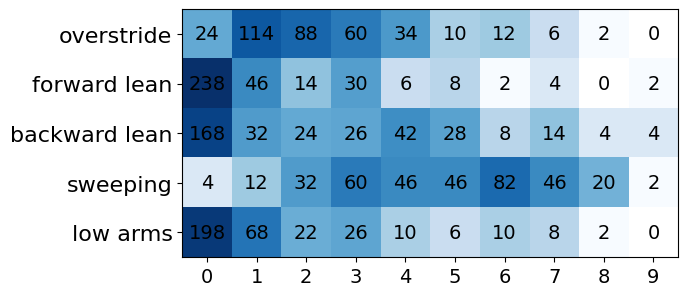

In [15]:
ratings = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

type_count = np.zeros((5, 10), dtype=int)

video_data = os.listdir(raw_dir)
errors = ['overstride', 'forward lean', 'backward lean', 'sweeping', 'low arms']

for filename in video_data:
    if ('WS' in filename):
        type_count[0][int(filename[4])] += 1
        type_count[1][int(filename[7])] += 1
        type_count[2][int(filename[10])] += 1
        type_count[3][int(filename[13])] += 1
        type_count[4][int(filename[16])] += 1


fig, ax = plt.subplots()
im = ax.imshow(np.log(type_count), cmap='Blues')

ax.set_xticks(np.arange(len(ratings)))
ax.set_yticks(np.arange(len(errors)))
ax.set_xticklabels(ratings, fontsize=14)
ax.set_yticklabels(errors, fontsize=16)

for i in range(len(errors)):
    for j in range(len(ratings)):
        text = ax.text(j, i, type_count[i, j], ha="center", va="center", color="black", fontsize=14)

plt.show()